**Metodi di classificazione: pca -> lda**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target
caratt=iris.feature_names
varietà=iris.target_names
print(caratt)
print(varietà)
print(set(iris.target))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [4]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

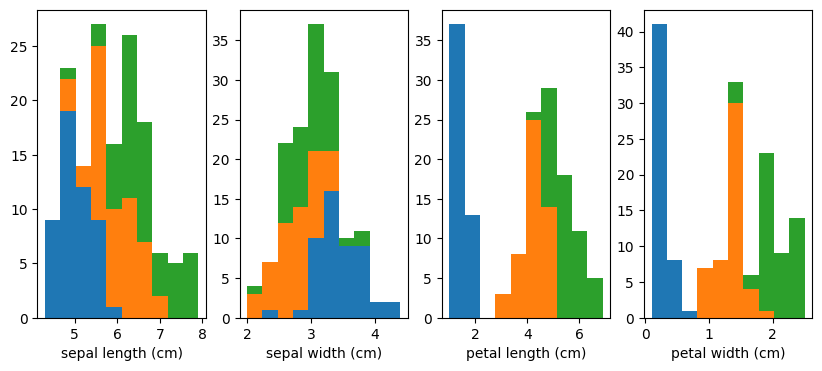

In [5]:
fig, axs=plt.subplots(ncols=4, figsize=(10,4))
for f in range(4):
    xf=[X[y==c,f] for c in range(3)]
    axs[f].hist(xf, stacked=True)
    axs[f].set_xlabel(caratt[f])
#    axs[f].violinplot(X[:,f], positions=0)
#    for t in range(3):
#        axs[f].violin

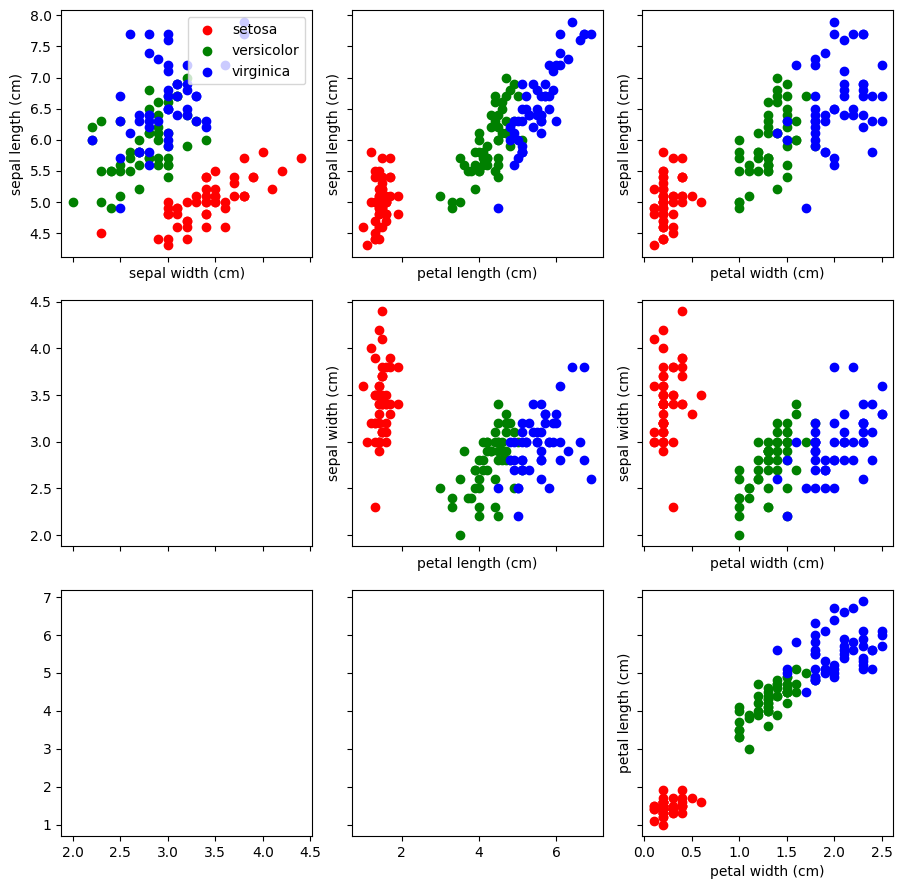

In [6]:
fig, axs=plt.subplots(figsize=(9,9), ncols=3, nrows=3, sharex='col', sharey='row')
colors=['red', 'green', 'blue']
for i in range(3):
    for j in range(i+1,4):
        ax=axs[i][j-1]
        for c in set(iris.target):
            xi=np.where(iris.target==c)
            ax.scatter(X[xi,j], X[xi,i], c=colors[c], label=iris.target_names[c])
        ax.set_xlabel(caratt[j])
        ax.set_ylabel(caratt[i])
        if i==0 and j==1:
            ax.legend()
fig.tight_layout()

In [7]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xt = pca.transform(X)

In [8]:
pca.components_


array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

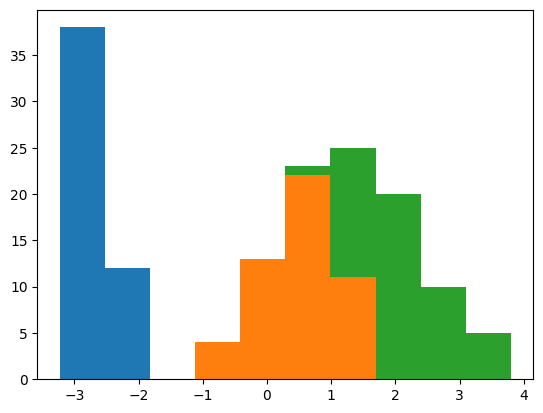

In [9]:
xf=[Xt[y==c,0] for c in range(3)]
_=plt.hist(xf, stacked=True)

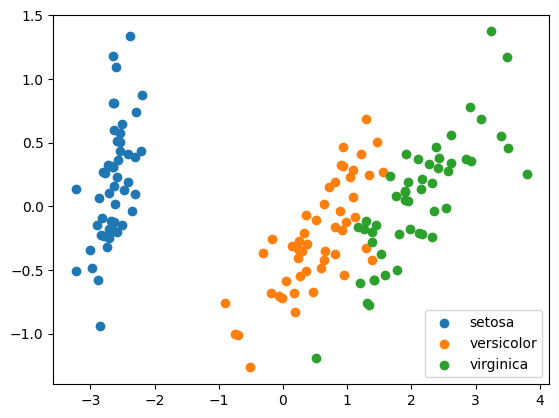

In [10]:
for v in range(3):
    plt.scatter(Xt[y==v,0], Xt[y==v,1], label=varietà[v])
plt.legend()

**LDA** analisi lineare discriminante

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [12]:
lda = LinearDiscriminantAnalysis(n_components=2)
Xt2 = lda.fit(X, y).transform(X)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

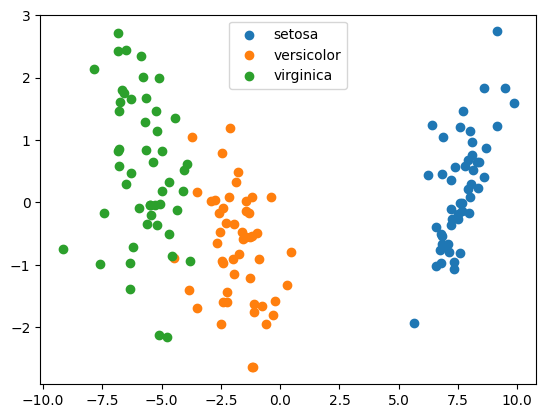

In [14]:
for v in range(3):
    plt.scatter(Xt2[y==v,0], Xt2[y==v,1], label=varietà[v])
plt.legend()

In [15]:
lda.predict(X[-4:,:])

array([2, 2, 2, 2])

In [16]:
import numpy.random as rnd

In [17]:
tot=len(X)
ind=np.arange(tot)
rnd.shuffle(ind)
ntrain=tot*9//10
Xtrain=X[ind[:ntrain],:]
Xtest=X[ind[ntrain:],:]
ytrain=y[ind[:ntrain]]
ytest=y[ind[ntrain:]]

In [18]:
Xtest,ytest

(array([[6.4, 3.2, 5.3, 2.3],
        [6.1, 3. , 4.9, 1.8],
        [5.2, 4.1, 1.5, 0.1],
        [4.8, 3.4, 1.6, 0.2],
        [7.2, 3.6, 6.1, 2.5],
        [6.5, 3.2, 5.1, 2. ],
        [6.5, 3. , 5.8, 2.2],
        [6. , 3. , 4.8, 1.8],
        [5.7, 2.8, 4.5, 1.3],
        [5.8, 2.7, 5.1, 1.9],
        [6.6, 2.9, 4.6, 1.3],
        [6.3, 2.3, 4.4, 1.3],
        [5.7, 2.5, 5. , 2. ],
        [4.8, 3.1, 1.6, 0.2],
        [6.8, 2.8, 4.8, 1.4]]),
 array([2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1]))

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(Xtrain,ytrain)

LinearDiscriminantAnalysis(n_components=2)

In [20]:
predizione=lda.predict(Xtest)

In [21]:
predizione

array([2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1])

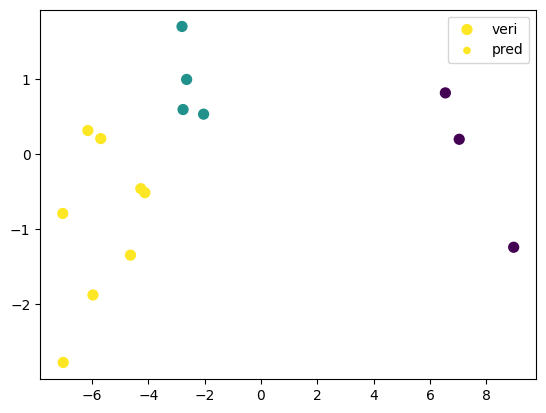

In [22]:
Xtt=lda.transform(Xtest)
plt.scatter(Xtt[:,0], Xtt[:,1], c=ytest, s=50, label="veri")
plt.scatter(Xtt[:,0], Xtt[:,1], c=predizione, s=20, label="pred")
plt.legend()

In [23]:
from sklearn import metrics

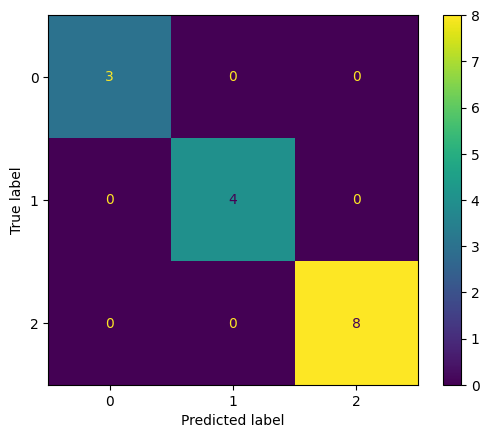

In [24]:
metrics.ConfusionMatrixDisplay.from_predictions(ytest, predizione)